In [1]:
from statsmodels.tsa.stattools import grangercausalitytests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# build the time series, just a simple AR(1)
t1 = [0.1 * np.random.normal()]
for _ in range(100):
    t1.append(0.5 * t1[-1] + 0.1 * np.random.normal())

In [3]:
# build the time series that is granger caused by t1
t2 = [item + 0.1 * np.random.normal() for item in t1]

In [4]:
# adjust t1 and t2
t1 = t1[3:]
t2 = t2[:-3]

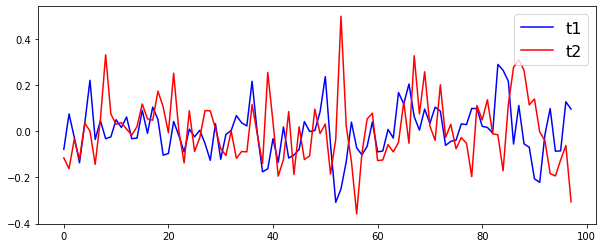

In [5]:
plt.figure(figsize=(10, 4))
plt.plot(t1, color="b")
plt.plot(t2, color="r")

plt.legend(["t1", "t2"], fontsize=16)

In [6]:
ts_df = pd.DataFrame(columns=["t2", "t1"], data=zip(t2, t1))

In [7]:
ts_df

,t2,t1
0,-0.115690,-0.078352
1,-0.162457,0.074587
2,-0.034897,-0.026395
3,-0.122664,-0.136752
4,0.035216,0.032923
...,...,...
93,-0.183734,0.098137
94,-0.193813,-0.086521
95,-0.124510,-0.085094
96,-0.061961,0.127517


In [9]:
gc_res = grangercausalitytests(ts_df, maxlag=3)


Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.3403  , p=0.5611  , df_denom=94, df_num=1
ssr based chi2 test:   chi2=0.3512  , p=0.5535  , df=1
likelihood ratio test: chi2=0.3505  , p=0.5538  , df=1
parameter F test:         F=0.3403  , p=0.5611  , df_denom=94, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=4.2439  , p=0.0173  , df_denom=91, df_num=2
ssr based chi2 test:   chi2=8.9541  , p=0.0114  , df=2
likelihood ratio test: chi2=8.5608  , p=0.0138  , df=2
parameter F test:         F=4.2439  , p=0.0173  , df_denom=91, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=42.2533 , p=0.0000  , df_denom=88, df_num=3
ssr based chi2 test:   chi2=136.8431, p=0.0000  , df=3
likelihood ratio test: chi2=84.7575 , p=0.0000  , df=3
parameter F test:         F=42.2533 , p=0.0000  , df_denom=88, df_num=3
